In [1]:
#bank.csv

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [7]:
#Separate the target(dependent variable) Y and independent variable means X
X=df.drop("deposit",axis=1)
Y=df["deposit"] 

In [8]:
#Train_test_split()
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
from sklearn.metrics import classification_report

In [11]:
#create a function
def create_model(model):
    model.fit(X_train,Y_train) #train the model
    y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,y_pred))
    return model

In [12]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [13]:
#create the object of DecisionTreeClassifier
dt1=DecisionTreeClassifier()

In [14]:
#call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1760
           1       0.77      0.76      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [15]:
dt1.feature_importances_ 

array([0.07874504, 0.03488348, 0.0179906 , 0.01288811, 0.00045636,
       0.0790254 , 0.04451274, 0.00651398, 0.06210661, 0.07939571,
       0.09617824, 0.35588819, 0.01847078, 0.05784923, 0.01768823,
       0.03740729])

In [16]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [17]:
from sklearn import tree

In [18]:
features=X.columns

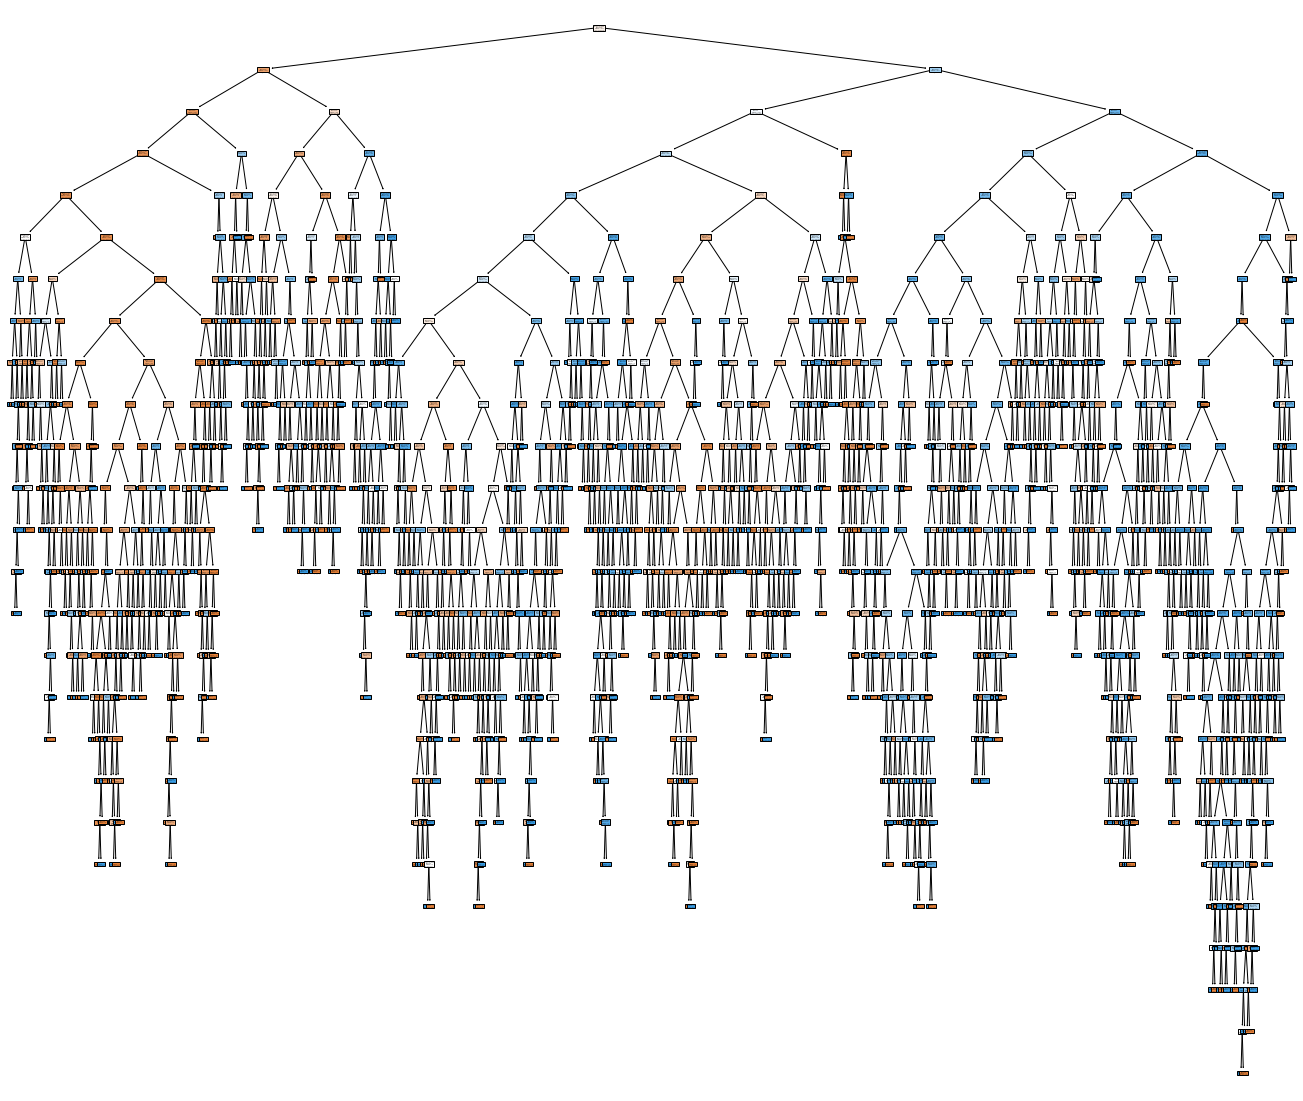

In [19]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [20]:
#Purning Technique  

In [ ]:
#Lecture 4-oct-2020 

In [ ]:
''' first purning technique : max_depth( ) : not more than 8'''

In [51]:
#create the object of DecisionTreeClassifier
dt2=DecisionTreeClassifier(max_depth=5) #not more than 8 

In [52]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



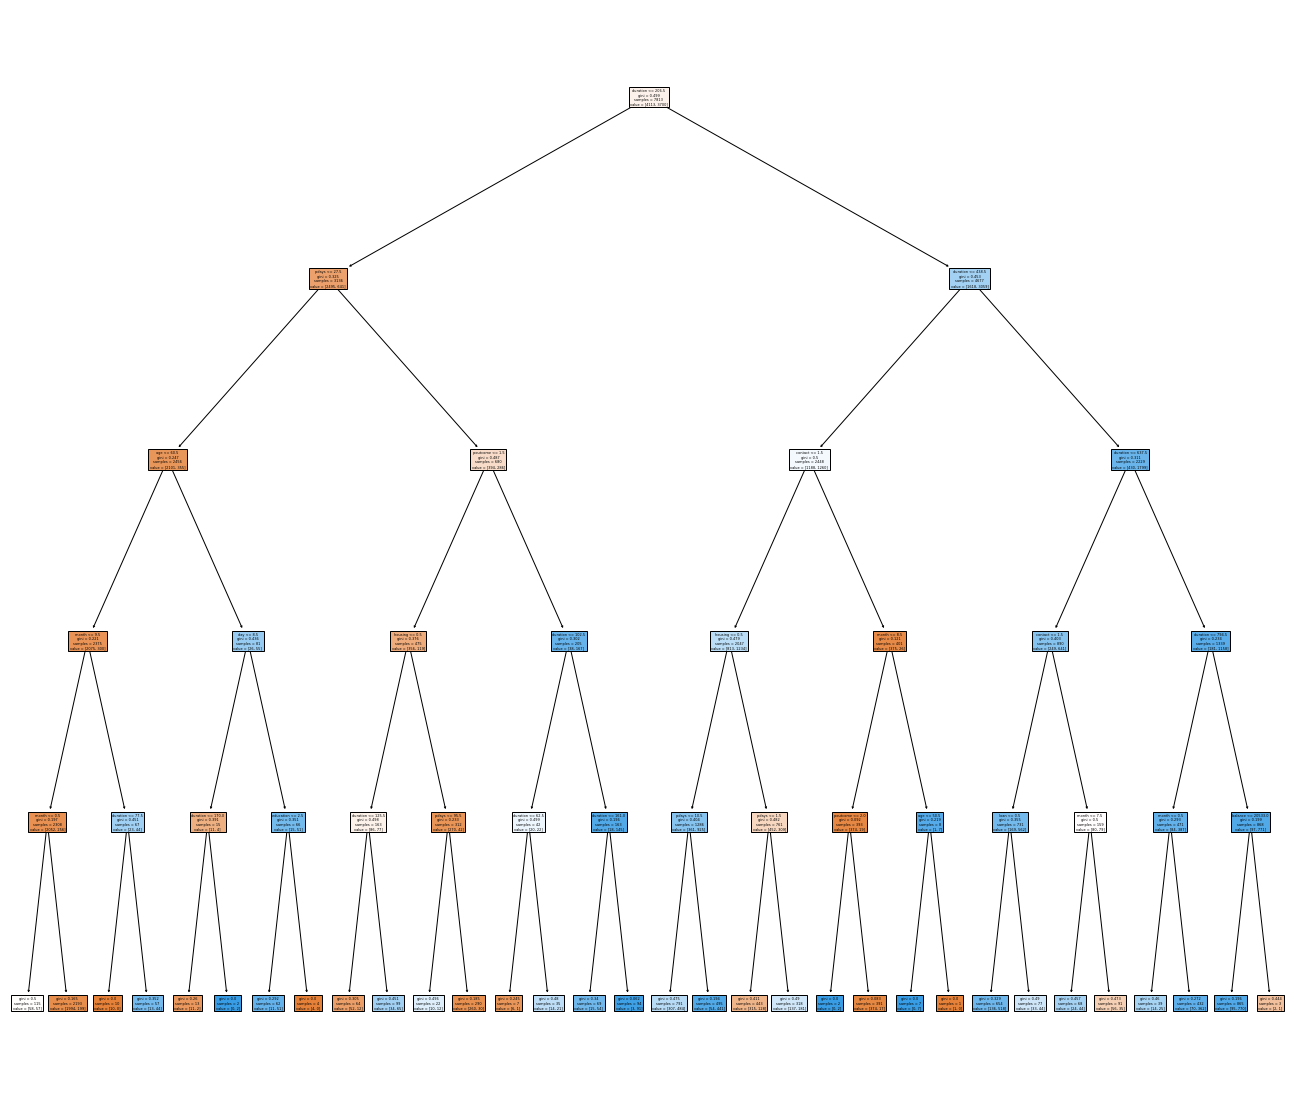

In [53]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [ ]:
''' second purning technique : min_samples_leaf :  inbuilt parameter : '''

In [62]:
#create the object of DecisionTreeClassifier
dt3=DecisionTreeClassifier(min_samples_leaf=48) 
#minimum samples leaf=50 or more  by defualt criterion : gininindex

In [63]:
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



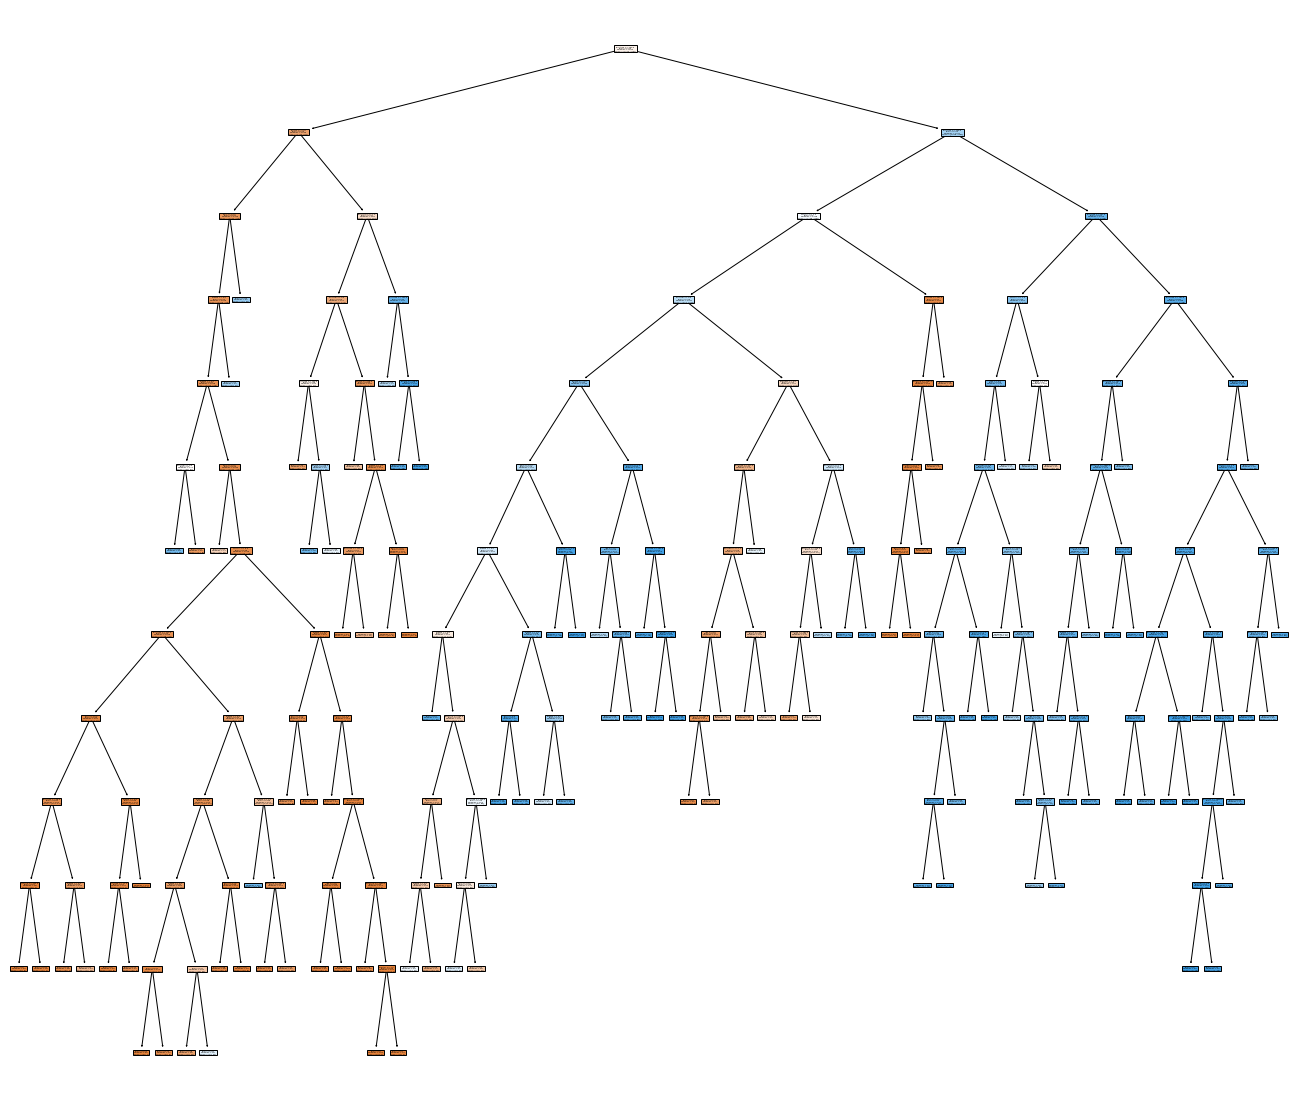

In [64]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [66]:
##create the object of DecisionTreeClassifier
dt4=DecisionTreeClassifier(min_samples_leaf=48,criterion='entropy')
#by default criterion='gini index'

In [67]:
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1760
           1       0.80      0.83      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [ ]:
#in this dataset : best puring technique : min_samples_leaf =48 
#criterion="gini" by default